In [7]:
# !mkdir data
!wget https://github.com/Intelligent-Systems-Phystech/psad/raw/master/hometask/sem3/zhestov.ea%40phystech.edu.csv -O data/zhestov.ea@phystech.edu.csv

--2021-03-01 14:54:23--  https://github.com/Intelligent-Systems-Phystech/psad/raw/master/hometask/sem3/zhestov.ea%40phystech.edu.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem3/zhestov.ea%40phystech.edu.csv [following]
--2021-03-01 14:54:23--  https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem3/zhestov.ea%40phystech.edu.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306 [text/plain]
Saving to: ‘data/zhestov.ea@phystech.edu.csv’

data/zhestov.ea@phy 100%[===================>]     306  --.-KB/s    

In [8]:
!pip install cryptorandom permute arch

In [9]:
import itertools

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt
from statsmodels.stats.descriptivestats import sign_test
from permute.core import one_sample
from arch.bootstrap import IIDBootstrap

In [10]:
data = pd.read_csv('data/zhestov.ea@phystech.edu.csv', header=None)[0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


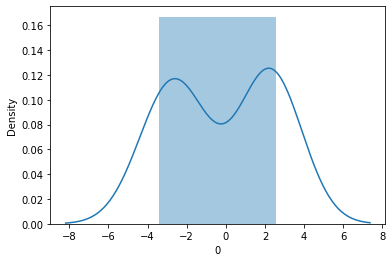

In [11]:
sns.distplot(data)

In [12]:
print('p-value = {:.2f}'.format(st.shapiro(data)[1]))

p-value = 0.01


Скорее всего это не нормальное распределение, что в целом и из графика заметно

In [13]:
w, p = st.wilcoxon(data)
round(p, 2)

0.58

In [14]:
s, p = sign_test(data)
round(p, 2)

1.0

In [15]:
2 ** data.shape[0]

4096

In [16]:
T = data - 0.5
t = sum(T)
count = 0
good = 0
for v in itertools.product([-1, 1], repeat = len(data)):
    count +=1
    stat = np.dot(T, v)
    if stat<=t:
        good+=1


good

759

In [17]:
bs = IIDBootstrap(data)
list(map(lambda x: round(x[0], 2), bs.conf_int(np.mean, 1000, method='basic')))

[-1.53, 1.22]